## Lab 1: Mixture of Beta Priors
#### Author: Nina Zacharia

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

## Mixture of Beta Priors 
Estimate the probability $p$ of teen recidivism based on a study in which there were $n = 43$ individuals released from incarceration and $y = 15$ re-offenders within 36 months.
#### Excercise 1: Using a $\textrm{Beta}(2,8)$ prior for $p$, plot the prior $\pi(p)$ and the posterior $\pi(p \mid y)$ as functions of $p$. Find the posterior mean and standard deviation of $p$. Find a $95\%$ quantile-based credible interval. You can use either the exact solution or approximation through Monte Carlo simulation.

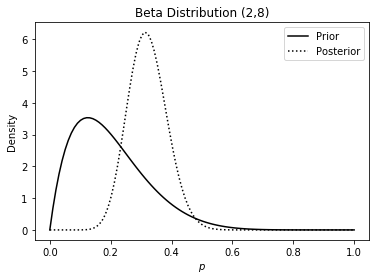

In [2]:
a = 2 
b = 8
n = 43
y = 15
a_post = a+y
b_post = b+n-y
x = np.linspace(0, 1.0, 100) 
plt.plot(x, stats.beta.pdf(x,a,b), ls = '-', c='black', label = 'Prior')
plt.plot(x, stats.beta.pdf(x,a_post,b_post), ls = ':', c='black', label = 'Posterior')
plt.xlabel('$p$')
plt.ylabel('Density')
plt.title('Beta Distribution (%d,%d)' % (a,b))
plt.legend(loc=0)
plt.show()

In [3]:
mean =  (a+y)/(a+b+n)
variance = (a_post*b_post)/(((a_post+b_post)**2)*(a_post+b_post+1))
sd = variance ** (1/2)
print(r'The mean is %.1f and the standard deviation is %.1f' % (mean,sd))

The mean is 0.3 and the standard deviation is 0.1


In [4]:
quant = (0.025,0.975)
ci = stats.beta.ppf(quant,a_post,b_post)
print('The 95%% credible interval is (%.3f,%.3f).' % (ci[0],ci[1]))

The 95% credible interval is (0.203,0.451).


#### Exercise 2: Repeat Exercise 1, but using a $\textrm{Beta}(8,2)$ prior for $p$.

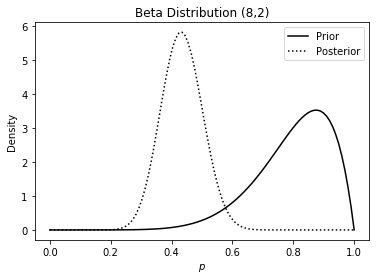

In [75]:
a = 8
b = 2 
a_post = a+y
b_post = b+n-y
x = np.linspace(0, 1.0, 100) 
plt.plot(x, stats.beta.pdf(x,a,b), ls = '-', c='black', label = 'Prior')
plt.plot(x, stats.beta.pdf(x,a_post,b_post), ls = ':', c='black', label = 'Posterior')
plt.xlabel('$p$')
plt.ylabel('Density')
plt.title('Beta Distribution (%d,%d)' % (a,b))
plt.legend(loc=0)
plt.show()

In [76]:
mean =  (a+y)/(a+b+n)
variance = (a_post*b_post)/(((a_post+b_post)**2)*(a_post+b_post+1))
sd = variance ** (1/2)
print(r'The mean is %.2f and the standard deviation is %.2f' % (mean,sd))

The mean is 0.4 and the standard deviation is 0.1


#### Exercise 3: Consider the following prior distribution for $p$, a $75-25\%$ mixture of a $\textrm{Beta}(2,8)$ and a $\textrm{Beta}(8,2)$ prior distribution. Plot this prior distribution and compare it to the priors in Exercise 1 and Exercise 2. Describe what sort of prior opinion this may represent.
$$
\pi(p) = \frac{1}{4}\frac{\Gamma(10)}{\Gamma(2)\Gamma(8)}[3p(1-p)^7 + p^7(1-p)],
$$

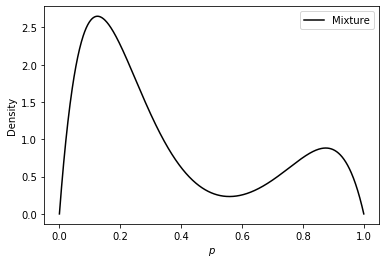

In [85]:
p = np.linspace(0, 1, 1000) 
mixture = 0.75*stats.beta.pdf(p, 2, 8) + 0.25*stats.beta.pdf(p, 8, 2)
plt.plot(p, mixture, ls = '-', c='black', label = 'Mixture')
plt.xlabel('$p$')
plt.ylabel('Density')
plt.legend(loc=0)
plt.show()